# 6521603795 Patiphat Aiamram lab 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [28]:
# import insurance dataset จาก  kaggle
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data preprocessing

In [38]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [32]:
# ordinal encoding 'smoker' column
order = ['yes', 'no']
OE = OrdinalEncoder(categories=[order])
df['smoker'] = OE.fit_transform(df[['smoker']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0.0,southwest,16884.92400
1,18,male,33.770,1,1.0,southeast,1725.55230
2,28,male,33.000,3,1.0,southeast,4449.46200
3,33,male,22.705,0,1.0,northwest,21984.47061
4,32,male,28.880,0,1.0,northwest,3866.85520


In [33]:
# ordinal encoding 'sex' column
order = ['female', 'male']
OE = OrdinalEncoder(categories=[order])
df['sex'] = OE.fit_transform(df[['sex']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,0.0,southwest,16884.92400
1,18,1.0,33.770,1,1.0,southeast,1725.55230
2,28,1.0,33.000,3,1.0,southeast,4449.46200
3,33,1.0,22.705,0,1.0,northwest,21984.47061
4,32,1.0,28.880,0,1.0,northwest,3866.85520


In [34]:
# one hot encoding 'region' column
OHE = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False,
                   ).set_output(transform='pandas')
OHE_region_df = OHE.fit_transform(df[['region']])
OHE_region_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [35]:
df = pd.concat([ df, OHE_region_df] , axis =1)
df

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0.0,27.900,0,0.0,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1.0,33.770,1,1.0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1.0,33.000,3,1.0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1.0,22.705,0,1.0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1.0,28.880,0,1.0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,1.0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0.0,31.920,0,1.0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0.0,36.850,0,1.0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0.0,25.800,0,1.0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [36]:
df.drop(columns= 'region', inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0.0,27.900,0,0.0,16884.92400,0.0,0.0,0.0,1.0
1,18,1.0,33.770,1,1.0,1725.55230,0.0,0.0,1.0,0.0
2,28,1.0,33.000,3,1.0,4449.46200,0.0,0.0,1.0,0.0
3,33,1.0,22.705,0,1.0,21984.47061,0.0,1.0,0.0,0.0
4,32,1.0,28.880,0,1.0,3866.85520,0.0,1.0,0.0,0.0


In [39]:
# scaling  data
scaler = StandardScaler()
df[['age', 
    'sex', 
    'bmi', 
    'children', 
    'smoker', 
    'charges', 
    'region_northeast', 
    'region_northwest',
    'region_southeast', 
    'region_southwest']] = scaler.fit_transform(df[['age', 
    'sex', 
    'bmi', 
    'children', 
    'smoker', 
    'charges', 
    'region_northeast', 
    'region_northwest',
    'region_southeast', 
    'region_southwest']])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-1.010519,-0.453320,-0.908614,-1.970587,0.298584,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.509621,-0.078767,0.507463,-0.953689,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.383307,1.580926,0.507463,-0.728675,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.305531,-0.908614,0.507463,0.719843,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.292556,-0.908614,0.507463,-0.776802,-0.565267,1.765481,-0.611324,-0.566418


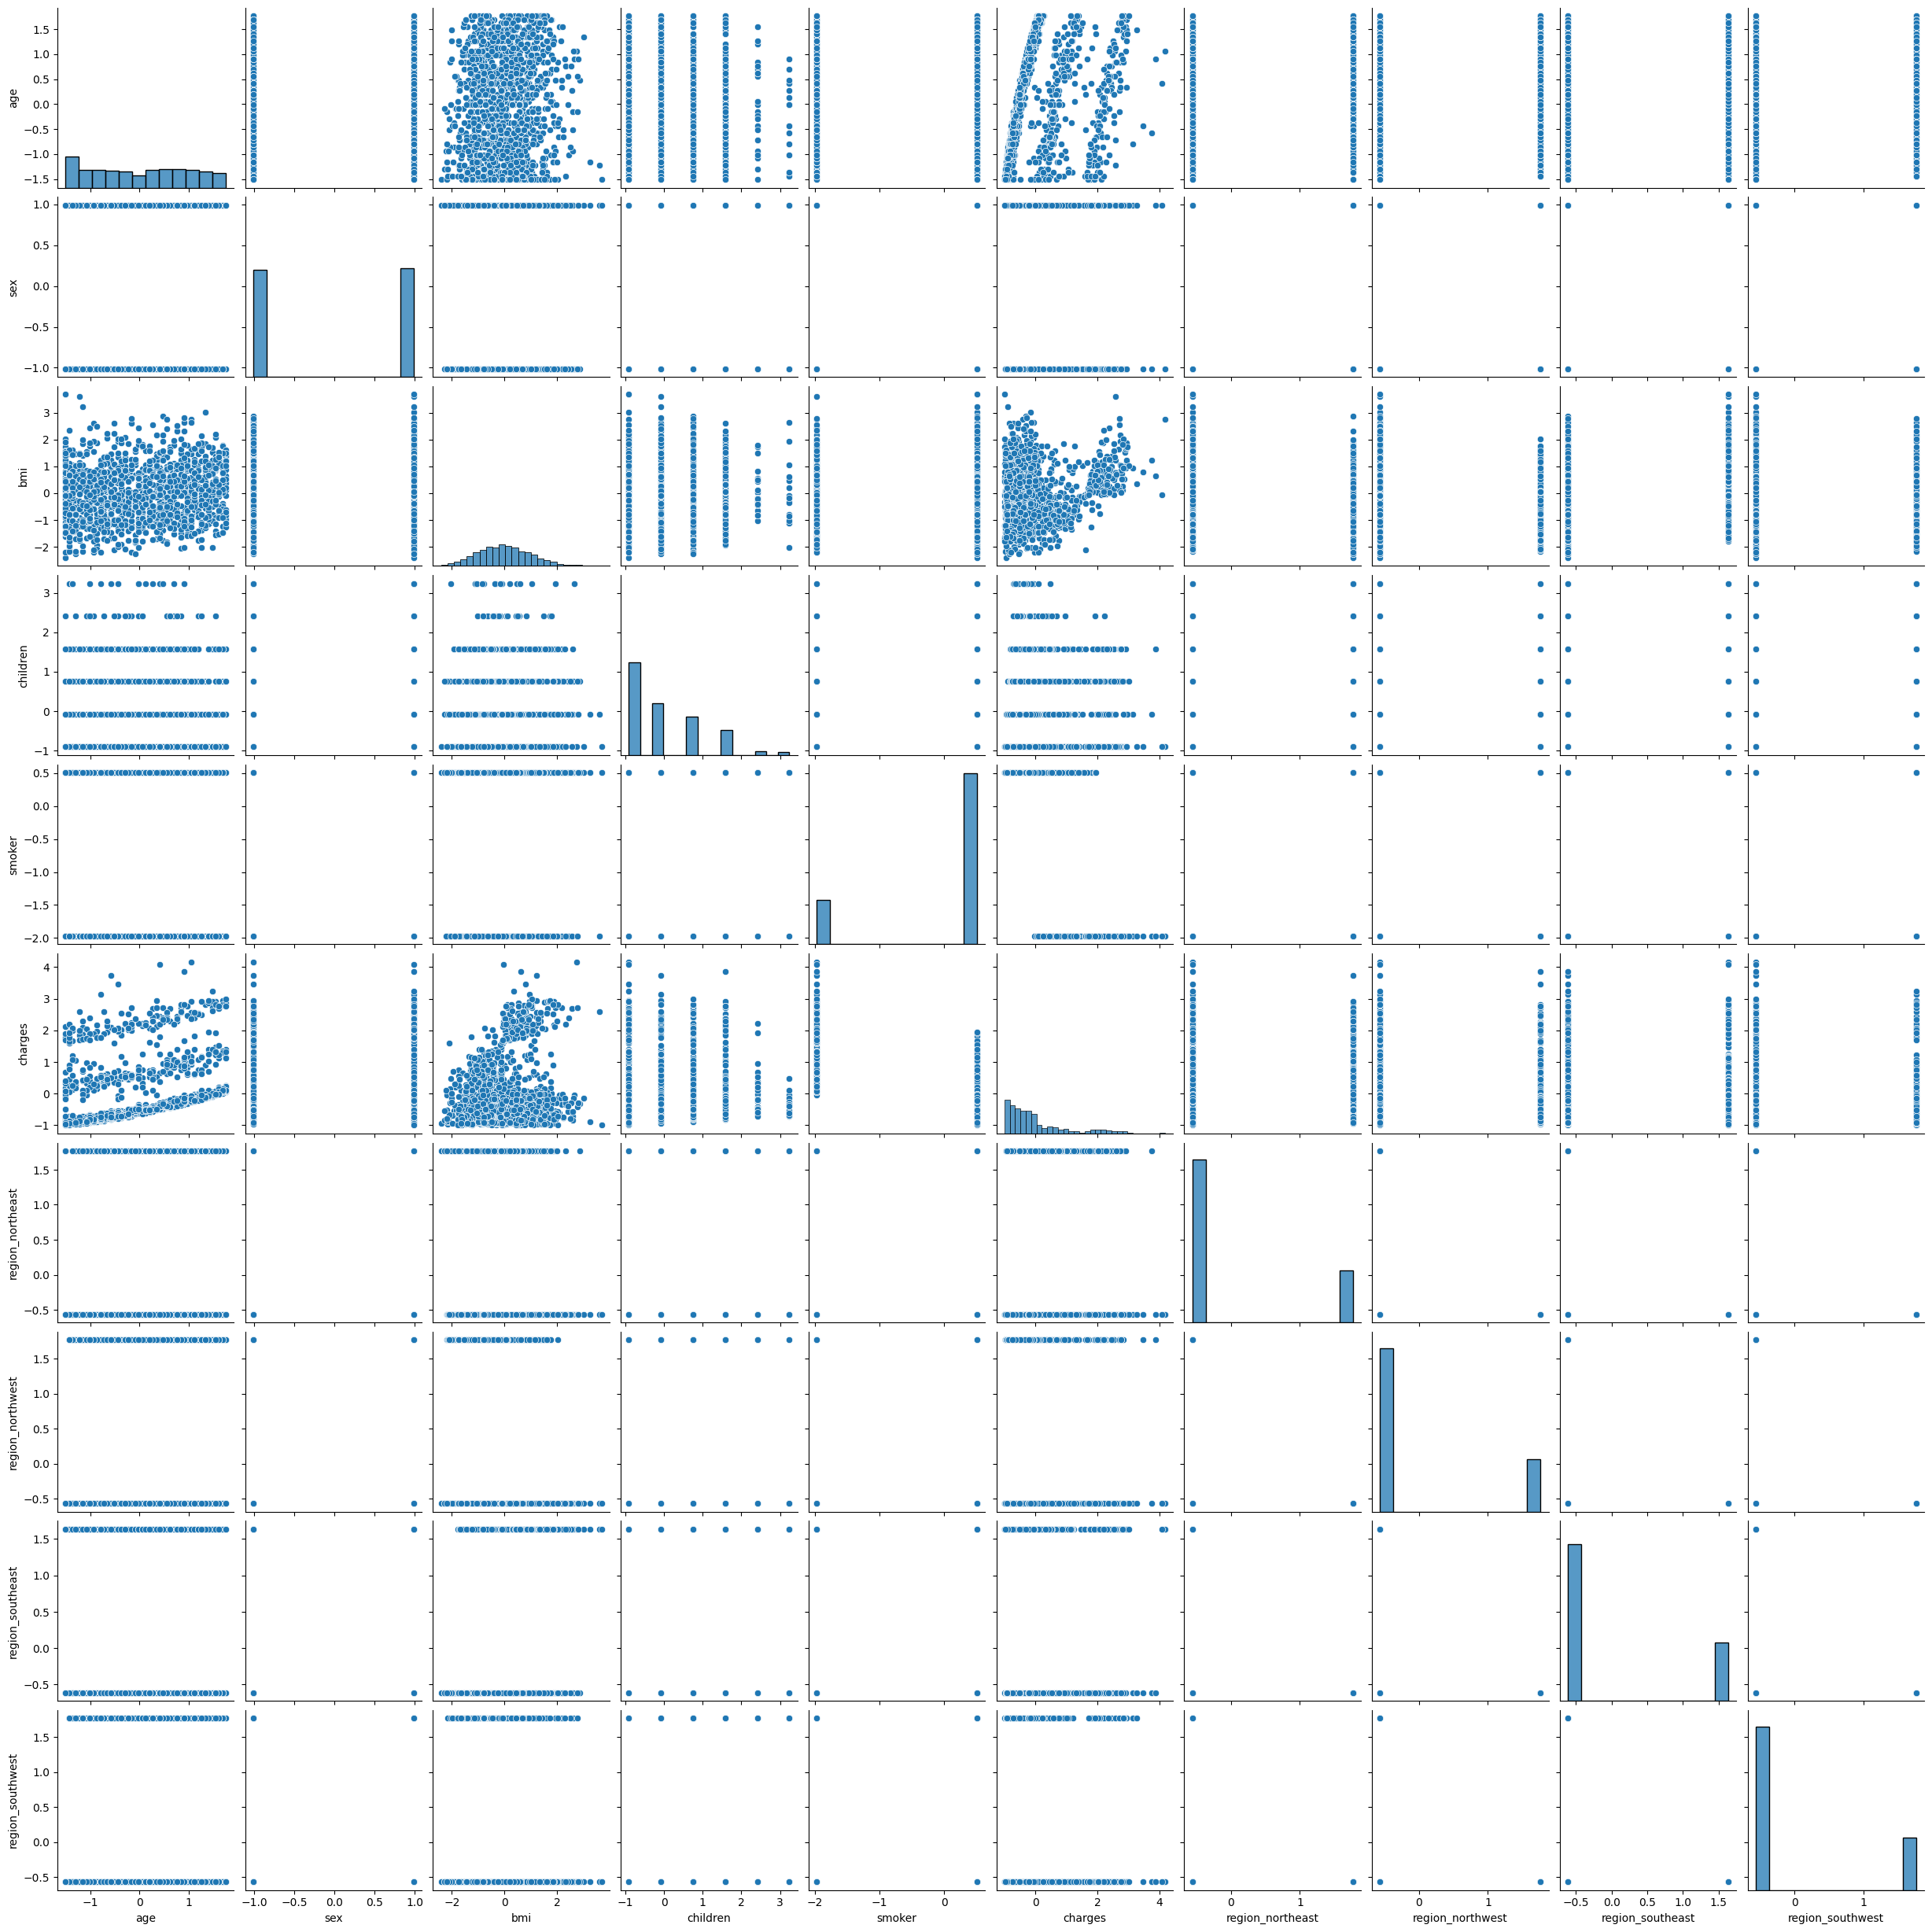

In [40]:
sns.pairplot(df)

In [64]:
X = df[['bmi']]
y = df['charges']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [65]:
y_pred = model.predict(X)

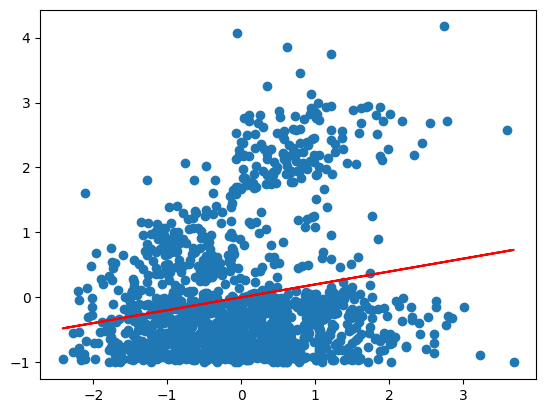

In [66]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
# evaluate model
score = mean_squared_error(y ,y_pred)
print(f'mse : {score} ')

mse : 0.9606608600821375 
